In [3]:
conda install -c conda-forge scikit-fuzzy 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/yosep/opt/anaconda3

  added / updated specs:
    - scikit-fuzzy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38h50d1736_0        16.9 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    scikit-fuzzy-0.4.2         |             py_1         710 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.6 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38
  scikit-fuzzy       conda-forge/noarch::scikit-fuzzy

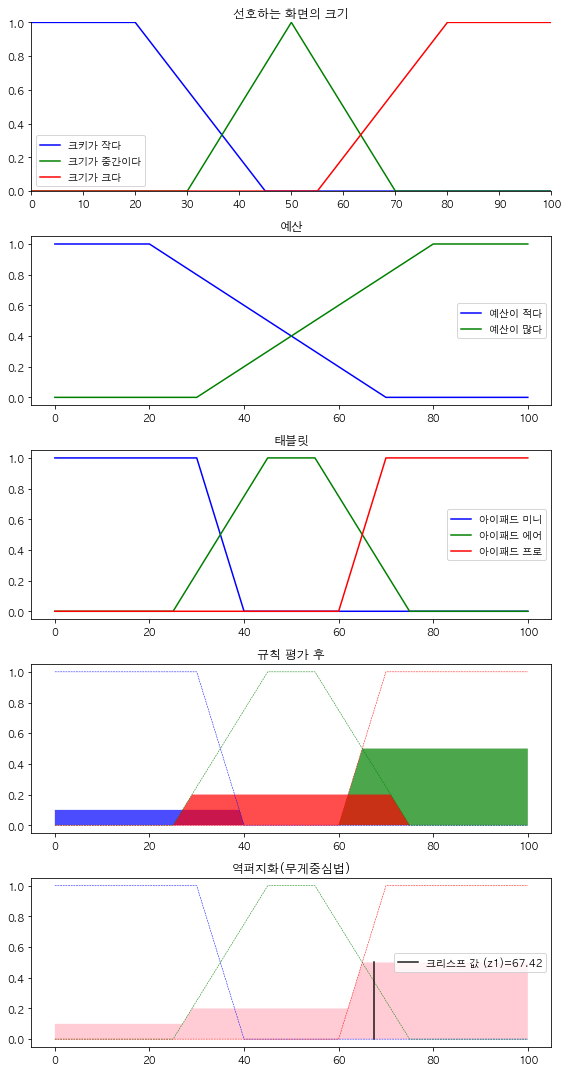

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
## 퍼지전문가 시스템 코딩 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 눈금 지정 :
x = np.arange(0, 101, 1) 
y = np.arange(0, 101, 1) 
z = np.arange(0, 101, 1)

# 퍼지 영역 정의 : 범위는 그래프를 위해 임의 지정 
A1 = fuzz.trapmf(x, [0, 0, 20, 45])
A2 = fuzz.trimf(x, [30, 50, 70])
A3 = fuzz.trapmf(x, [55, 80, 100, 100])
B1 = fuzz.trapmf(y, [0, 0, 20, 70])
B2 = fuzz.trapmf(y, [30, 80, 100, 100])
C1 = fuzz.trapmf(z, [0, 0, 30, 40])
C2 = fuzz.trapmf(z, [25, 45, 55, 75]) 
C3 = fuzz.trapmf(z, [60, 70, 100, 100])

# 그래프 총 5개 그릴 예정
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(8, 15))

# 선호하는 화면의 크기(x) 그래프
plt.rc('font', family='AppleGothic')
ax0.plot(x, A1, 'b', linewidth=1.5, label='크키가 작다') 
ax0.plot(x, A2, 'g', linewidth=1.5, label='크기가 중간이다') 
ax0.plot(x, A3, 'r', linewidth=1.5, label='크기가 크다') 
ax0.set_title('선호하는 화면의 크기')
ax0.legend()

# 예산(y) 그래프
ax1.plot(y, B1, 'b', linewidth=1.5, label='예산이 적다') 
ax1.plot(y, B2, 'g', linewidth=1.5, label='예산이 많다') 
ax1.set_title('예산')
ax1.legend()


# 태블릿(z) 그래프
ax2.plot(z, C1, 'b', linewidth=1.5, label='아이패드 미니') 
ax2.plot(z, C2, 'g', linewidth=1.5, label='아이패드 에어') 
ax2.plot(z, C3, 'r', linewidth=1.5, label='아이패드 프로') 
ax2.set_title('태블릿')
ax2.legend()




##########################################################
####################
# 멤버십함수 대응
xA1, xA2, xA3 = 0., 0.2, 0.5,
yB1, yB2 = 0.1, 0.7

# 규칙1: IF x가 A1 OR y가 B1, THEN z는 C1 
C1_rule1 = max(xA1, yB1) # 규칙 1: 계산용 
gr_rule1 = np.fmin(C1_rule1, C1) # 규칙 1 : 그래프용


# 규칙2: IF x가 A3 OR y가 B2, THEN z는 C3
C3_rule2 = min(xA3, yB2) # 규칙 2: 계산용
gr_rule2 = np.fmin(C3_rule2, C3) # 규칙 2 : 그래프용

# 규칙3: IF x가 A2, THEN z가 C2 
C2_rule3 = xA2 # 규칙 3: 계산용 
gr_rule3 = np.fmin(C2_rule3, C2) # 규칙 3: 그래프용

z0 = np.zeros_like(z) 

# 규칙 평가 합산 그래프
ax3.fill_between(z, z0, gr_rule1, facecolor='b', alpha=0.7) 
ax3.plot(z, C1, 'b', linewidth=0.5, linestyle='--', ) 
ax3.fill_between(z, z0, gr_rule2, facecolor='g', alpha=0.7)
ax3.plot(z, C2, 'g', linewidth=0.5, linestyle='--') 
ax3.fill_between(z, z0, gr_rule3, facecolor='r', alpha=0.7) 
ax3.plot(z, C3, 'r', linewidth=0.5, linestyle='--') 
ax3.set_title('규칙 평가 후')

##########################################################
####################
# 규칙 후건의 통합 : 그래프용
aggregated = np.fmax(gr_rule1, np.fmax(gr_rule2, gr_rule3))

# 역퍼지화(무게중심법:centroid)
# 'centroid' 기능이 skfuzzy 제공 패키지가 있지만
# ᄂ ex) z1 = fuzz.defuzz(z, aggregated, 'centroid')
# 정의 했던 A1~C3 퍼지 영역 눈금이 명확하지 않기 때문에 해당 패키지 사용 불가 
# 아래와 같이 별도 계산하여 도출

z1 = ((0+10+20)*C1_rule1 + (30+40+50+60)*C2_rule3 + (70+80+90+100)*C3_rule2) \
    / ((C1_rule1 * 3) + (C3_rule2 * 4) + (C2_rule3 * 4)) # 역퍼지화 그래프
z_activation = fuzz.interp_membership(z, aggregated, z1)
ax4.plot(z, C1, 'b', linewidth=0.5, linestyle='--')
ax4.plot(z, C2, 'g', linewidth=0.5, linestyle='--')
ax4.plot(z, C3, 'r', linewidth=0.5, linestyle='--')
ax4.fill_between(z, z0, aggregated, facecolor='pink', alpha=0.8)
ax4.plot([z1, z1], [0, z_activation], 'k', linewidth=1.5, label='크리스프 값 (z1)={:.2f}'.format(z1), alpha=0.9)
ax4.legend() 
ax4.set_title('역퍼지화(무게중심법)')

# 그래프 최종 시각화
for ax in (ax0, ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.get_xaxis().tick_bottom() 
    ax.get_yaxis().tick_left() 
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 100])
    ax.set_xticks([i for i in range(0,101,10)])
    plt.tight_layout() 
    plt.show()
